In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [4]:
from pubval import PubChemValidator
pcv = PubChemValidator(None, None, None)

/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/lightfm/_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn('LightFM was compiled without OpenMP support. '


In [86]:
pcv.load_checkpoint()
print(len(pcv.predictions))

4871


In [66]:
# for pred in pcv.predictions.keys():
#     lig, targ = pred.split(':')
#     print(pcv.predictions[pred]['nn'])

In [67]:
import tqdm
import pandas as pd

df = pd.DataFrame(columns=['tid', 'pref_name', 'lig_chemblid', 'aid', 'outcome', 'title'])
count = 0 
acts = list()

inacts= list()
probs= list()
nns = list()
for pred in tqdm.tqdm_notebook(pcv.predictions.keys()):
    lig, targ = pred.split(':')
    try:
        target_synonyms = pcv.targets[targ]['synonyms']
        tid = pcv.targets[targ]['tid']
        pref_name = pcv.targets[targ]['pref_name']
        
        ligand_chemblid = pcv.ligands[lig]['chemblid']
    
        assays = pcv.ligands[lig]['assays']
    except:
        continue
        
    act = 0
    inact = 0
    unspec = 0
    
    
    for a in assays:
        aid = a[0]
        title = a[2]
        clean_title = pcv.clean_text(title)
        #print(target_synonyms, clean_title)
        num = len(set(target_synonyms).intersection(clean_title.split()))
        if num>0:
            outcome =  a[1]
            if outcome=='Unspecified':
                unspec+=1
            if outcome=='Active':
                #print(aid, clean_title, target_synonyms)
                act+=1
            if outcome=='Inactive':
                inact+=1
            if outcome in ['Active', 'Inactive']:
                df.loc[count] = [tid, pref_name, ligand_chemblid, aid, outcome, title]
                count+=1
    if sum([act, inact])>0:
        prob = pcv.predictions[pred]['prob']
        nn = pcv.predictions[pred]['nn']
        nns.append(nn)
        acts.append(act)
        inacts.append(inact)
        probs.append(float(prob))
        #print( act, inact, prob)#, unspec ) 
        
acts = np.array(acts)
inacts = np.array(inacts)
nns =np.array(nns)
probs = np.array(probs)

/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


In [68]:
df.sort_values(by='pref_name').to_csv('results.csv')

In [69]:
piv = df.pivot_table(index=['pref_name','lig_chemblid'], columns='outcome', aggfunc='size', fill_value=0)


In [70]:
n,x = np.histogram((piv['Active'] - piv['Inactive']).values, bins=100)

(-5.0, 5.0)

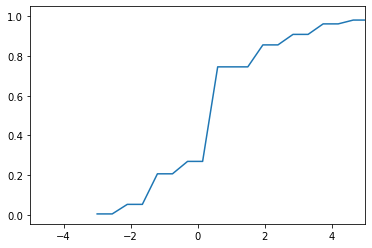

In [71]:
plt.plot(x[:-1], np.cumsum(n) / sum(n))
plt.xlim(-5,5)

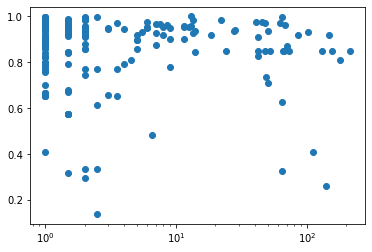

In [73]:
plt.scatter(nns, probs)
plt.xscale('log')

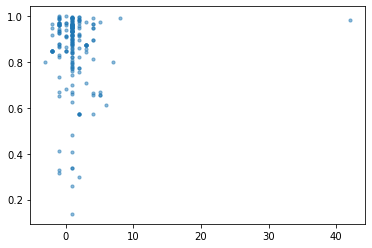

In [74]:
plt.scatter(np.array(acts) - np.array(inacts), 
            [float(i) for i in probs],
           s=10,
           alpha=0.5)

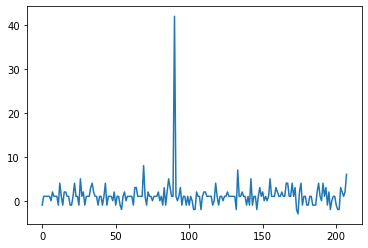

In [75]:
plt.plot(np.array(acts) - np.array(inacts))

In [76]:
d =np.vstack([np.array(acts),np.array(inacts)])

In [77]:
p = list()
n = list()
checks = np.arange(1,100)
for rank in checks:
    mask = nns>rank

    m = d.T[mask]
    res = (m[:,0] - m[:,1])

    
    p.append((res>0).sum())
    n.append((res<0).sum())
    print(f'RANK:{rank}')
    print('\t', (res>0).sum())
    print('\t',(res<0).sum())

RANK:1
	 85
	 35
RANK:2
	 43
	 27
RANK:3
	 37
	 26
RANK:4
	 33
	 25
RANK:5
	 28
	 25
RANK:6
	 24
	 25
RANK:7
	 23
	 22
RANK:8
	 21
	 21
RANK:9
	 17
	 21
RANK:10
	 17
	 21
RANK:11
	 17
	 21
RANK:12
	 15
	 21
RANK:13
	 14
	 19
RANK:14
	 11
	 18
RANK:15
	 11
	 18
RANK:16
	 11
	 18
RANK:17
	 11
	 18
RANK:18
	 11
	 18
RANK:19
	 10
	 18
RANK:20
	 10
	 18
RANK:21
	 10
	 18
RANK:22
	 9
	 18
RANK:23
	 9
	 18
RANK:24
	 9
	 18
RANK:25
	 9
	 18
RANK:26
	 9
	 18
RANK:27
	 9
	 18
RANK:28
	 8
	 18
RANK:29
	 8
	 18
RANK:30
	 8
	 18
RANK:31
	 8
	 18
RANK:32
	 8
	 18
RANK:33
	 8
	 18
RANK:34
	 8
	 18
RANK:35
	 8
	 18
RANK:36
	 8
	 18
RANK:37
	 8
	 18
RANK:38
	 8
	 18
RANK:39
	 8
	 18
RANK:40
	 8
	 18
RANK:41
	 7
	 18
RANK:42
	 7
	 16
RANK:43
	 7
	 16
RANK:44
	 7
	 16
RANK:45
	 6
	 16
RANK:46
	 6
	 16
RANK:47
	 6
	 16
RANK:48
	 6
	 14
RANK:49
	 6
	 13
RANK:50
	 5
	 12
RANK:51
	 5
	 12
RANK:52
	 5
	 11
RANK:53
	 5
	 11
RANK:54
	 5
	 11
RANK:55
	 5
	 11
RANK:56
	 5
	 11
RANK:57
	 5
	 11
RANK:58
	 5
	 11
RA

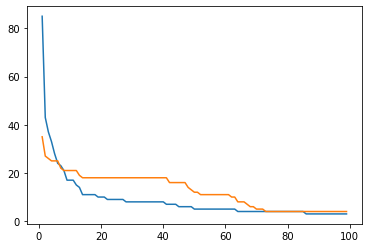

In [78]:
plt.plot(checks, p)
plt.plot(checks, n)

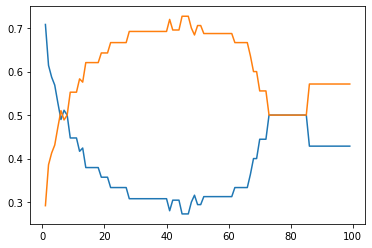

In [79]:
plt.plot(checks, 
         np.array(p) / (np.array(p)+np.array(n)))

plt.plot(checks, 
         np.array(n) / (np.array(p)+np.array(n)))

In [80]:
from scipy.stats import beta


Text(0.5, 0, 'Best ranking by similarity (1=easy, 10=hard, 20=very hard)')

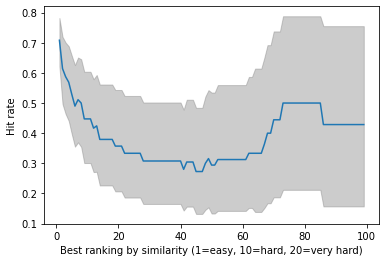

In [81]:

rate = np.array(p) / (np.array(p) + np.array(n))
low = beta.ppf(0.025, np.array(p)+1, np.array(n)+1)
high =beta.ppf(0.975, np.array(p)+1, np.array(n)+1)
plt.fill_between(x=checks,y1=low, y2=high,alpha=0.4, color='grey')
plt.plot(checks, rate)

plt.ylabel('Hit rate')
plt.xlabel('Best ranking by similarity (1=easy, 10=hard, 20=very hard)')


# #rate = np.array(n) / (np.array(p) + np.array(n))
# rate = 1-rate
# #low = beta.ppf(0.025, np.array(n)+1, np.array(p)+1)
# #high =beta.ppf(0.975, np.array(n)+1, np.array(p)+1)
# plt.fill_between(x=checks,y1=1-low, y2=1-high,alpha=0.4, color='grey')
# plt.plot(checks, rate)

# rate = np.array(p) / (np.array(p) + np.array(n))

<BarContainer object of 10 artists>

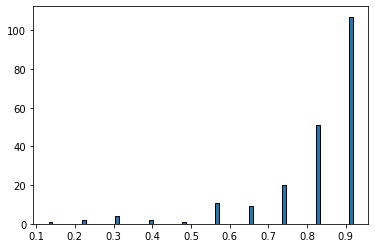

In [84]:
nbin = 10
n,x= np.histogram(probs,bins=nbin)
plt.bar(x[:-1], n,edgecolor='k', width=0.01)

1.0 0.15811388300841897 0.9874208829065749
1.0 0.2924017738212866 0.9915962413403874
0.5 0.14663279963467313 0.8533672003653268
0.5 0.09429932405024608 0.9057006759497539
1.0 0.15811388300841897 0.9874208829065749
0.9090909090909091 0.6152038348490558 0.9791374745399076
0.75 0.39990642628368783 0.9251453685803082
0.9 0.6962255930860758 0.9695110323784845
0.7272727272727273 0.5805532952579822 0.8363374395543188
0.7821782178217822 0.6918596356032035 0.851368765230279


Text(0, 0.5, 'Hit rate')

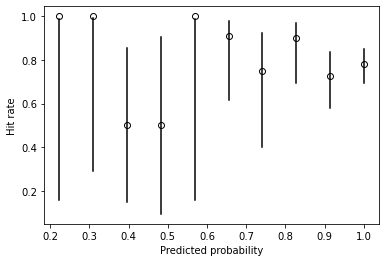

In [85]:
digits = np.digitize(probs,x)
for b in range(1,nbin+1):
    mask = digits==b
    
    pos = ((d[0] - d[1])>0)[mask].sum()
    neg = ((d[0] - d[1])<0)[mask].sum()
    
    low = beta.ppf(0.025, pos+1, neg+1)
    high = beta.ppf(0.975, pos+1, neg+1)
    print(pos/(pos+neg), low, high)
    
    plt.plot([ x[b], x[b]], [low, high], c='k')
    
    plt.scatter([x[b]], [pos/(pos+neg)],edgecolor = 'k', facecolor='white')
    
    
plt.xlabel('Predicted probability')
plt.ylabel('Hit rate')

In [546]:
low

0.01257911709342505

In [ ]:
plt.

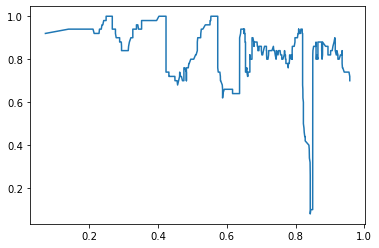

In [540]:
def moving_average(a, n=50) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

avgs = moving_average( ( d.T[np.argsort(probs)][:,0] - d.T[np.argsort(probs)][:,1]) > 0 ) 
pr = probs[np.argsort(probs)][:len(avgs)]

plt.plot(pr,avgs )

In [529]:
np.digitize(probs,x)==0

array([False, False, False, ..., False, False, False])

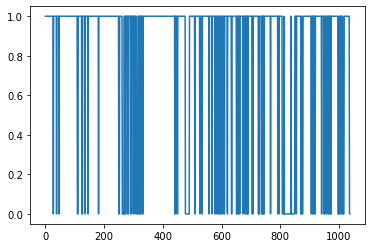

In [289]:
from seaborn import kdeplot
res = (d[0] - d[1])>0

plt.plot(res[np.argsort(probs)])

In [306]:
list((d[0] - d[1]) )

[2,
 3,
 1,
 3,
 1,
 2,
 5,
 1,
 1,
 -1,
 -1,
 2,
 1,
 2,
 1,
 5,
 1,
 3,
 2,
 2,
 1,
 2,
 -2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 -6,
 1,
 2,
 5,
 1,
 1,
 -6,
 -1,
 1,
 5,
 1,
 4,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 -4,
 10,
 2,
 1,
 1,
 -1,
 2,
 1,
 1,
 0,
 2,
 2,
 1,
 1,
 -6,
 4,
 5,
 2,
 1,
 1,
 4,
 2,
 3,
 1,
 -6,
 1,
 -26,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 -1,
 2,
 -1,
 1,
 -24,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 -2,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 3,
 -6,
 0,
 1,
 1,
 2,
 1,
 2,
 -4,
 -1,
 1,
 0,
 9,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 -6,
 3,
 2,
 1,
 2,
 1,
 -1,
 -1,
 1,
 2,
 2,
 2,
 -1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 3,
 4,
 1,
 1,
 2,
 1,
 1,
 1,
 -1,
 0,
 2,
 0,
 2,
 2,
 1,
 1,
 1,
 -1,
 1,
 2,
 2,
 -1,
 1,
 1,
 2,
 1,
 2,
 -1,
 1,
 1,
 2,
 2,
 4,
 1,
 2,
 2,
 1,
 1,
 -1,
 2,
 2,
 11,
 5,
 2,
 4,
 2,
 1,
 -2,
 4,
 1,
 2,
 1,
 6,
 2,
 1,
 1,
 1,
 -2,
 3,
 6,
 -3,
 -6,
 2,
 -1,
 2,
 7,
 2,
 -2,
 1,
 2,
 2,
 2,
 -2,
 5,
 4,
 2,
 1,


In [303]:
list(np.sign(d[0] - d[1]))

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 -1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 0,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,


In [291]:
res

array([ True,  True,  True, ...,  True,  True,  True])

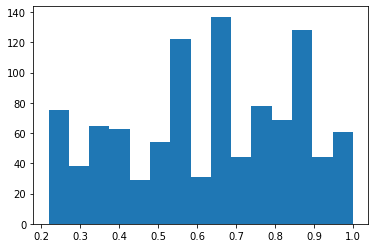

In [268]:
_ = plt.hist(probs,bins=15)

In [253]:
np.digitize(probs, x)

array([12, 17, 10, ...,  4, 12, 10])

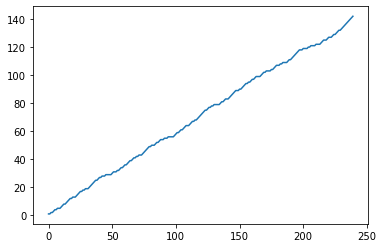

In [185]:
plt.plot(np.cumsum(m[:,0] > m[:,1]))

In [122]:
(np.array(acts)>0)

array([False, False,  True, ...,  True, False, False])

In [118]:
(np.array(inacts)==0)

array([ True,  True,  True, ..., False, False,  True])

In [99]:
lig, targ = pred.split(':')
    
target_synonyms = pcv.targets[targ]['synonyms']
    
assays = pcv.ligands[lig]['assays']

In [100]:
for count, a in enumerate(assays):
    title = a[2]
    clean_title = pcv.clean_text(title)
    #print(target_synonyms, clean_title)
    num = len(set(target_synonyms).intersection(clean_title.split()))
    if num>0:
        print( len(set(target_synonyms).intersection(clean_title.split())) )
        print(clean_title, count)

In [75]:
clean_title

'ncats parallel artificial membrane permeability assay  pampa profiling'

In [49]:
snms = pcv.targets[targ]['synonyms']


In [53]:
for a in pcv.ligands[lig]['assays']:
    title = a[2]
    clean_title = pcv.clean_text(title)
    print( len(set(snms).intersection(clean_title.split())) )

0
0
0


In [39]:
#take a random sample of assays across the (many) higher probability ones:
n = 400_000
take = 20000

weight = 1 / (np.arange(n)/take+1)
weight = weight/weight.sum()

sample = np.random.choice(n, take, p=weight, replace=False)

In [40]:
import matplotlib.pyplot as plt

# Update:

- **LDH paper.** draft done and on simuldocs. Lyndsey keen to submit by mid next week, I think this is easily doable given it's a pretty straightforward paper. I am leaning towards J. Nat. Prod.

- **Label correlation**. Re-ran all the pubchem validation stuff - Results are in! When you include all predictions, even those that would have been predicted highly by nearest neighbors, you get about an 80% hit rate. If you exclude the ones that were similar in structure anyway, indicating a prediction that is difficult to make with LBVS, then the hit rate reduces down to about 20% for the most dissimilar ligands. I think one in five is pretty good for dissimilar predictions!
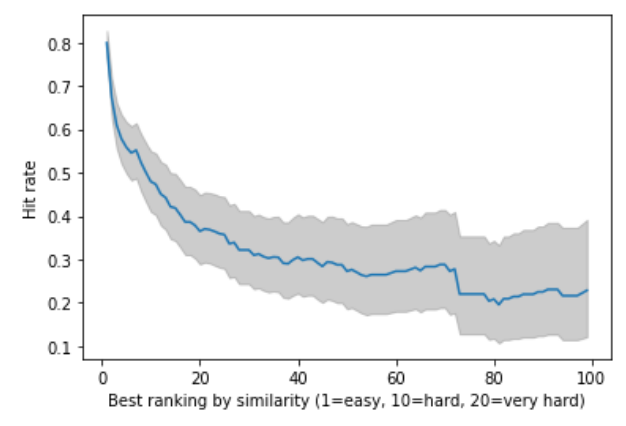

- **Cholesterol CBD**. No progress.